<a href="https://colab.research.google.com/github/Maria-arroyo18/Integracion-de-datos2025/blob/main/Taller1_Maria_Fernanda_Arroyo_Berrocal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1

**Fecha de entrega:** Miércoles 6 de agosto

Se tiene un conjunto de datos de 1500 registros con las siguientes variables:

- edad_cliente (años)
- tiempo_como_cliente_meses
- ingresos_mensuales (dolares)
- visitas_mensuales_sitio_web
- contactos (call-center)
- nivel_educativo (1:primaria, 2:secundaria, 3:tecnico-tecnologico, 4:universitario, 5 posgrado)
- uso_tarjeta_credito (1: Si, 0: No)
- participa_en_promociones (1: Si, 0: No)
- calificacion_satisfaccion (1-5, donde 1 es muy bajo y 5 es excelente)
- descuento_promedio_usado (%)
- ventas_cliente (Ventas promedio al cliente en dolares)


Se espera que el cientifico de datos presente el mejor modelo de regresión posible para predecir las ventas del cliente, con el respectivo informe ejecutivo para el gerente.
Se deben validar todos los supuestos de la regresión y que esta no presente problemas.


# **1. Cargar librerías, conectar Drive y cargar datos**

In [ ]:
import pandas as pd # manejo de Data Frame en Python
pd.set_option('display.max_columns', 50) # Aumenta el número de columnas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path= "/content/drive/MyDrive/Aprendizaje/dataset_regresion_ventas.csv" # Colocar la ubicación del archivo
df = pd.read_csv(path, encoding='latin1')
df.head() # Mostrar los primeros 5 registros

,edad_cliente,tiempo_como_cliente_meses,ingresos_mensuales,visitas_mensuales_sitio_web,contactos,nivel_educativo,uso_tarjeta_credito,participa_en_promociones,calificacion_satisfaccion,descuento_promedio_usado,ventas_cliente
0,50,62,3450,6,0,4,0,1,4,0.26,371.17
1,49,7,2580,4,3,4,1,1,3,0.21,329.62
2,42,92,3090,6,1,4,0,1,3,0.29,589.01
3,30,119,3000,12,1,2,1,1,4,0.21,476.49
4,40,108,2840,4,1,1,1,0,5,0.00,460.06


In [ ]:
df.isna().sum() #Nos fijamos si hay datos faltantes

,0
edad_cliente,0
tiempo_como_cliente_meses,0
ingresos_mensuales,0
visitas_mensuales_sitio_web,0
contactos,0
nivel_educativo,0
uso_tarjeta_credito,0
participa_en_promociones,0
calificacion_satisfaccion,0
descuento_promedio_usado,0


In [ ]:
df.describe()

,edad_cliente,tiempo_como_cliente_meses,ingresos_mensuales,visitas_mensuales_sitio_web,contactos,nivel_educativo,uso_tarjeta_credito,participa_en_promociones,calificacion_satisfaccion,descuento_promedio_usado,ventas_cliente
count,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,44.00000,60.322667,3016.646667,4.882667,2.017333,2.514667,0.495333,0.850000,3.340000,0.127033,445.717813
std,15.06787,34.077452,764.174236,2.168879,1.406539,1.118311,0.500145,0.357191,1.267072,0.095871,130.536744
min,18.00000,1.000000,800.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-5.680000
25%,31.00000,31.000000,2480.000000,3.000000,1.000000,1.750000,0.000000,1.000000,2.000000,0.040000,353.867500
50%,44.00000,61.000000,3020.000000,5.000000,2.000000,3.000000,0.000000,1.000000,4.000000,0.120000,444.820000
75%,57.00000,89.000000,3530.000000,6.000000,3.000000,3.250000,1.000000,1.000000,4.000000,0.210000,536.202500
max,69.00000,119.000000,5150.000000,12.000000,8.000000,4.000000,1.000000,1.000000,5.000000,0.300000,833.220000


#**MODELOS DE REGRESIÓN**

#**PRIMER MODELO**

Modelo de Regresión Simple

In [ ]:
Y = df['ventas_cliente']
X = df['tiempo_como_cliente_meses']

In [ ]:
# Para usar las variables de la regresión, estas deben ser tipo array
X = np.array(X).reshape(-1, 1)
Y = np.array(Y).reshape(-1, 1)

# Modelo de regresión
modelo = LinearRegression()
modelo.fit(X, Y)

# Ver coeficientes
print("Intercepto (a):", modelo.intercept_)
print("Pendiente (b):", modelo.coef_)

Intercepto (a): [338.79350595]
Pendiente (b): [[1.77253947]]


In [ ]:
b= sum((X-X.mean())*(Y-Y.mean()))/sum((X-X.mean())**2)
b

array([1.77253947])

- Por cada mes que una persona permanece como cliente, las ventas promedio aumentan en $1.77 USD.

In [ ]:
a= Y.mean()-b*X.mean()
a

array([338.79350595])

- Aquellas personas que son clientes nuevos (0 meses) compran en promedio 338.79 USD.

In [ ]:
# Intercepto
X_const = sm.add_constant(X)

# Modelo de regresión
modelo_sm = sm.OLS(Y, X_const).fit()

# Imprimir el resumen del modelo (incluye la ecuación y ANOVA)
print(modelo_sm.summary())

# Obtener y mostrar los residuales
residuales = modelo_sm.resid
print("\nResiduales:")
print(residuales)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     408.1
Date:                Thu, 07 Aug 2025   Prob (F-statistic):           1.86e-80
Time:                        01:12:25   Log-Likelihood:                -9254.7
No. Observations:                1500   AIC:                         1.851e+04
Df Residuals:                    1498   BIC:                         1.852e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        338.7935      6.078     55.739      0.0

R²: Esto significa que el 21.4% de la variabilidad en las ventas promedio se puede explicar únicamente por el tiempo que un cliente ha permanecido con la empresa ya que es la unica variable.

F-statistic: El modelo es estadísticamente significativo en conjunto.

Intervalo de Confianza del Coeficiente: El intervalo es estrecho por lo que se entiende que el coeficiente es confiable y relevante para el modelo.

Valor p: El coeficiente es bastante importante, lo que quiere decir que el tiempo como cliente sí influye en las ventas.

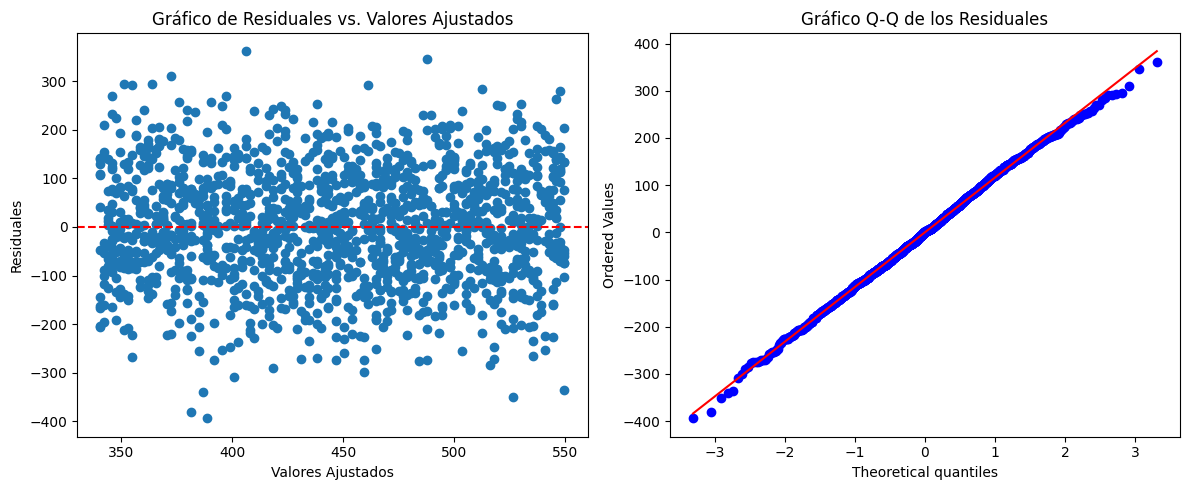

In [ ]:
# Gráfico de residuales vs. valores ajustados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(modelo_sm.fittedvalues, residuales)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales vs. Valores Ajustados')

# Gráfico Q-Q de los residuales
plt.subplot(1, 2, 2)
stats.probplot(residuales, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuales')

plt.tight_layout()
plt.show()

# **SEGUNDO MODELO**

In [ ]:
Y2 = df['ventas_cliente']
X2 = df[['ingresos_mensuales',"visitas_mensuales_sitio_web"]]

In [ ]:
X2 = np.array(X2)
Y2 = np.array(Y2).reshape(-1, 1)

# Modelo de regresión
modelo2 = LinearRegression()
modelo2.fit(X2, Y2)

# Ver coeficientes
print("Intercepto (a):", modelo2.intercept_)
print("Pendiente (b):", modelo2.coef_)

Intercepto (a): [311.9478094]
Pendiente (b): [[0.03468808 5.96565902]]


-  Por cada dólar adicional de ingreso mensual que tenga el cliente, las ventas aumentan en promedio $0.83 USD.

- Por cada visita adicional al sitio web, las ventas aumentan en promedio $5.97 USD.



In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.30, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones
Y2_train_pred = modelo2.predict(X2_train)
Y2_test_pred = modelo2.predict(X2_test)

# Evaluación en entrenamiento
mse_train = mean_squared_error(Y2_train, Y2_train_pred)
r2_train = r2_score(Y2_train, Y2_train_pred)

# Evaluación en prueba
mse_test = mean_squared_error(Y2_test, Y2_test_pred)
r2_test = r2_score(Y2_test, Y2_test_pred)

# Resultados
print("MSE Train:", mse_train)
print("MSE Test:", mse_test)
print("R² Train:", r2_train)
print("R² Test:", r2_test)


MSE Train: 15292.129343764058
MSE Test: 18211.047731531136
R² Train: 0.04399701451513327
R² Test: 0.05700950251114034


In [ ]:
# Intercepto
X_const2 = sm.add_constant(X2)

# Modelo de regresión
modelo_sm2 = sm.OLS(Y2, X_const2).fit()

# Imprimir el resumen del modelo (incluye la ecuación y ANOVA)
print(modelo_sm2.summary())

# Obtener y mostrar los residuales
residuales2 = modelo_sm2.resid
print("\nResiduales:")
print(residuales2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     39.85
Date:                Thu, 07 Aug 2025   Prob (F-statistic):           1.38e-17
Time:                        01:12:26   Log-Likelihood:                -9396.5
No. Observations:                1500   AIC:                         1.880e+04
Df Residuals:                    1497   BIC:                         1.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        311.9478     15.378     20.285      0.0

R²: Este valor (0.051) indica que aproximadamente el 5.1% de la variabilidad en las ventas al cliente puede ser explicada por las variables ingresos_mensuales y visitas_mensuales_sitio_web. El modelo tiene poca capacidad explicativa por lo que ese valor es bajo.

R² ajustado: El valor ajustado es 0.049, y es muy similar al R², también bajo.

F-statistic: El valor de la F (39.85), indica que el modelo en su conjunto es estadísticamente significativo. Es decir, al menos una de las variables tiene un efecto real sobre las ventas.

Valor p: Ambos coeficientes (x1 y x2) tienen un p-valor menor a 0.001, lo que indica que son estadísticamente significativos a un nivel del 5%.

Intervalo de Confianza: Ninguno de estos intervalos contiene el cero, lo que refuerza la significancia estadística de ambas variables.

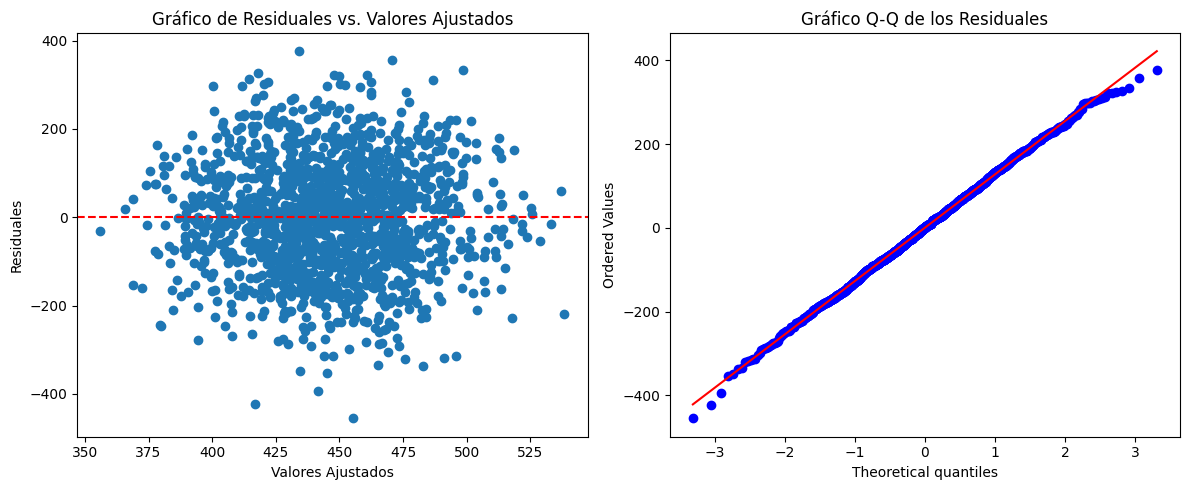

In [ ]:
# Gráfico de residuales vs. valores ajustados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(modelo_sm2.fittedvalues, residuales2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales vs. Valores Ajustados')

# Gráfico Q-Q de los residuales
plt.subplot(1, 2, 2)
stats.probplot(residuales2, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuales')

plt.tight_layout()
plt.show()

# **TERCER MODELO**

In [ ]:
Y3 = df['ventas_cliente']
X3 = df[['ingresos_mensuales',"visitas_mensuales_sitio_web", "tiempo_como_cliente_meses","uso_tarjeta_credito"]]

In [ ]:
X3 = np.array(X3)
Y3 = np.array(Y3).reshape(-1, 1)

# Modelo de regresión
modelo3 = LinearRegression()
modelo3.fit(X3, Y3)

# Ver coeficientes
print("Intercepto (a):", modelo3.intercept_)
print("Pendiente (b):", modelo3.coef_)

Intercepto (a): [181.69214681]
Pendiente (b): [[ 0.0366686   6.90766847  1.80752586 21.49428769]]


- Intercepto: Cuando todas las variables están en cero las ventas base estimadas son de 181.69 USD.

- Por cada dólar adicional de ingreso que tenga un cliente, se espera un aumento promedio de $0.0367 USD en ventas.

- Cada visita adicional a la pagina web representa unos $6.91 USD adicionales en ventas.

- Cada mes adicional como cliente genera $1.81 USD más en ventas.

- Los clientes que usan tarjeta de crédito gastan en promedio $21.49 USD más que los que no la usan.

In [ ]:
# División de datos: 70% entrenamiento, 30% prueba
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.30, random_state=42)

# Reentrenar el modelo con datos de entrenamiento
modelo3.fit(X3_train, Y3_train)

# Predicciones
Y3_train_pred = modelo3.predict(X3_train)
Y3_test_pred = modelo3.predict(X3_test)

# Evaluación en entrenamiento
mse_train3 = mean_squared_error(Y3_train, Y3_train_pred)
r2_train3 = r2_score(Y3_train, Y3_train_pred)

# Evaluación en prueba
mse_test3 = mean_squared_error(Y3_test, Y3_test_pred)
r2_test3 = r2_score(Y3_test, Y3_test_pred)

# Resultados
print("MSE Train:", mse_train3)
print("MSE Test:", mse_test3)
print("R² Train:", r2_train3)
print("R² Test:", r2_test3)

MSE Train: 11646.576205508309
MSE Test: 13825.06695759556
R² Train: 0.2719024687243228
R² Test: 0.2841209929076538


In [ ]:
# Intercepto
X_const3 = sm.add_constant(X3)

# Modelo de regresión
modelo_sm3 = sm.OLS(Y3, X_const3).fit()

# Imprimir el resumen del modelo (incluye la ecuación y ANOVA)
print(modelo_sm3.summary())

# Obtener y mostrar los residuales
residuales3 = modelo_sm3.resid
print("\nResiduales:")
print(residuales3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     144.6
Date:                Thu, 07 Aug 2025   Prob (F-statistic):          1.39e-104
Time:                        01:12:26   Log-Likelihood:                -9190.1
No. Observations:                1500   AIC:                         1.839e+04
Df Residuals:                    1495   BIC:                         1.842e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.6921     14.823     12.258      0.0

R²: Este valor (0.279) indica que aproximadamente el 27.9% de la variabilidad en las ventas puede ser explicada por las variables seleccionadas. Aunque no es muy alto, es el mejor desempeño obtenido hasta ahora.

R² ajustado: Similar al R², pero ajustado por el número de predictores del modelo. Es útil para comparar modelos con distinto número de variables.

F-statistic: Tiene un valor alto (144.6) con una probabilidad baja (p < 0.001) por lo que se entiende que el modelo es altamente significativo.

Valor p: Todos los coeficientes tienen p-valores menores a 0.001, lo cual indica que son estadísticamente significativos.

Intervalo de Confianza: Ninguno de estos intervalos contiene el cero, lo que refuerza la significancia estadística de todas las variables.


In [ ]:
#Revisamos si hay problemas de multicolinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionar las variables independientes del modelo 3
X_vif = df[['ingresos_mensuales', 'visitas_mensuales_sitio_web', 'tiempo_como_cliente_meses', 'uso_tarjeta_credito']]

# Crear DataFrame con VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Mostrar resultados
print(vif_data)


                      Variable       VIF
0           ingresos_mensuales  6.431284
1  visitas_mensuales_sitio_web  4.863131
2    tiempo_como_cliente_meses  3.558852
3          uso_tarjeta_credito  1.907531


- La variable "ingresos_mensuales" tiene un VIF de 6.43, lo que significa que existe un problema de multicolinealidad, es por eso que se eliminara del modelo para mejorar el desempeño.

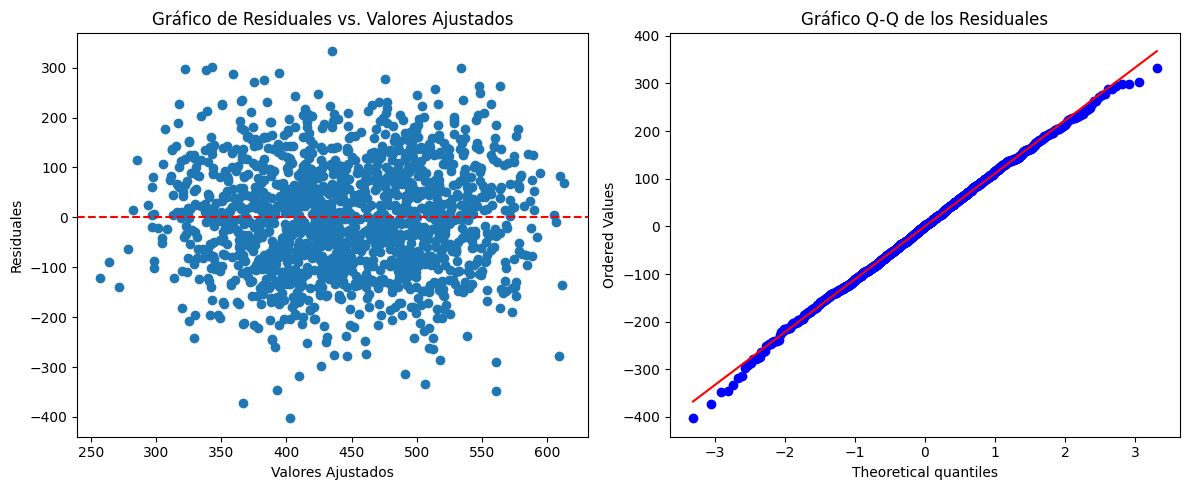

In [ ]:
# Gráfico de residuales vs. valores ajustados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(modelo_sm3.fittedvalues, residuales3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales vs. Valores Ajustados')

# Gráfico Q-Q de los residuales
plt.subplot(1, 2, 2)
stats.probplot(residuales3, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuales')

plt.tight_layout()
plt.show()

#**CUARTO MODELO**

In [ ]:
Y4 = df['ventas_cliente']
X4 = df[['descuento_promedio_usado',"visitas_mensuales_sitio_web", "tiempo_como_cliente_meses","uso_tarjeta_credito", "calificacion_satisfaccion"]]

In [ ]:
X4 = np.array(X4)
Y4 = np.array(Y4).reshape(-1, 1)

# Modelo de regresión
modelo4 = LinearRegression()
modelo4.fit(X4, Y4)

# Ver coeficientes
print("Intercepto (a):", modelo4.intercept_)
print("Pendiente (b):", modelo4.coef_)

Intercepto (a): [233.97516808]
Pendiente (b): [[334.78043831   6.12573345   1.79120328  17.50330567   6.76177441]]


Intercepto: Las ventas promedio estimadas cuando todas las variables independientes son cero son de 233.975 USD.

- Por cada porcentaje extra en el descuento, se espera un incremento promedio de $269.60 USD en las ventas. Es el coeficiente más fuerte del modelo.

- Cada visita mensual adicional al sitio se asocia con un aumento promedio de $6.36 USD en las ventas.

- Cada mes adicional de antigüedad del cliente aporta en promedio $1.74 USD más en ventas.

- Los clientes que usan tarjeta de crédito compran en promedio $16.66 USD más que quienes no la usan.

- Por cada punto adicional en satisfacción (escala de 1 a 5), se espera un aumento promedio de $6.95 USD en ventas.

In [ ]:
# División de datos: 70% entrenamiento, 30% prueba
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.30, random_state=42)

# Reentrenar el modelo con datos de entrenamiento
modelo4.fit(X4_train, Y4_train)

# Predicciones
Y4_train_pred = modelo4.predict(X4_train)
Y4_test_pred = modelo4.predict(X4_test)

# Evaluación en entrenamiento
mse_train4 = mean_squared_error(Y4_train, Y4_train_pred)
r2_train4 = r2_score(Y4_train, Y4_train_pred)

# Evaluación en prueba
mse_test4 = mean_squared_error(Y4_test, Y4_test_pred)
r2_test4 = r2_score(Y4_test, Y4_test_pred)

# Resultados
print("MSE Train:", mse_train4)
print("MSE Test:", mse_test4)
print("R² Train:", r2_train4)
print("R² Test:", r2_test4)

MSE Train: 11521.028420115354
MSE Test: 13177.146421214877
R² Train: 0.2797512159431411
R² Test: 0.31767111687317373


In [ ]:
# Intercepto
X_const4 = sm.add_constant(X4)

# Modelo de regresión
modelo_sm4 = sm.OLS(Y4, X_const4).fit()

# Imprimir el resumen del modelo (incluye la ecuación y ANOVA)
print(modelo_sm4.summary())

# Obtener y mostrar los residuales
residuales4 = modelo_sm4.resid
print("\nResiduales:")
print(residuales4)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     126.1
Date:                Thu, 07 Aug 2025   Prob (F-statistic):          1.52e-111
Time:                        01:12:27   Log-Likelihood:                -9171.3
No. Observations:                1500   AIC:                         1.835e+04
Df Residuals:                    1494   BIC:                         1.839e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        233.9752     12.251     19.098      0.0

R²: El modelo explica que aproximadamente el 29.7% de la variabilidad en las ventas. Aunque no es un valor muy alto, representa una mejora respecto a los modelos anteriores, lo que sugiere un mejor ajuste con las nuevas variables.

R² ajustado: El valor ajustado es 0.294, lo que confirma que el modelo se mantiene robusto incluso al considerar el número de predictores incluidos.

F-statistic: El valor indica que el modelo es estadísticamente significativo en general. Es decir, al menos una de las variables explica una parte importante de la variabilidad en las ventas.

Valor p: Todos los coeficientes son estadísticamente significativos (p < 0.05), lo que respalda su inclusión en el modelo.

Intervalos de Confianza: Todos los coeficientes tienen intervalos que no cruzan el cero, lo que refuerza su significancia estadística.

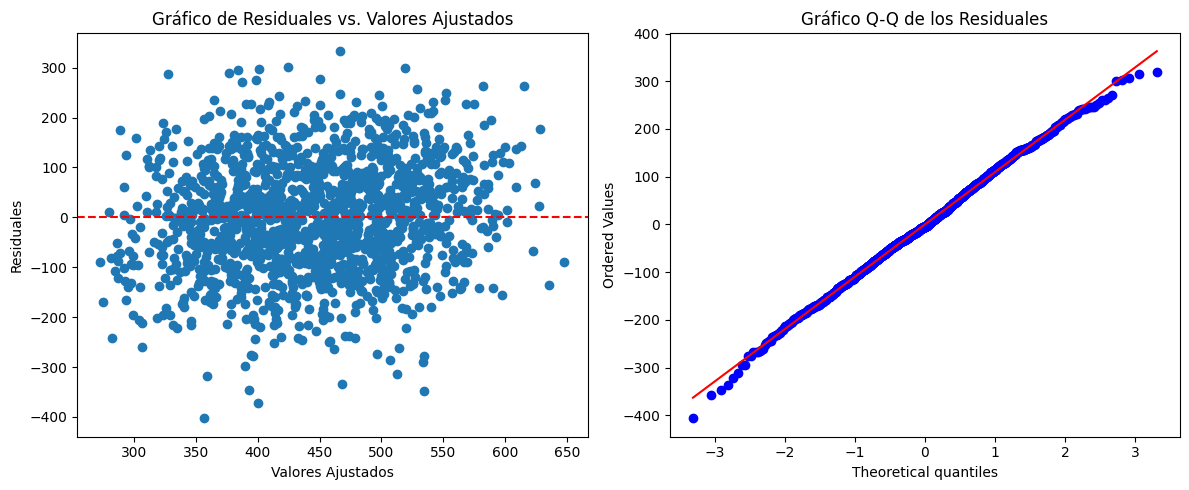

In [ ]:
# Gráfico de residuales vs. valores ajustados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(modelo_sm4.fittedvalues, residuales3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales vs. Valores Ajustados')

# Gráfico Q-Q de los residuales
plt.subplot(1, 2, 2)
stats.probplot(residuales4, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuales')

plt.tight_layout()
plt.show()

# **QUNTO MODELO**

In [ ]:
Y5 = df['ventas_cliente']
X5 = df[['descuento_promedio_usado',"visitas_mensuales_sitio_web", "tiempo_como_cliente_meses","uso_tarjeta_credito",
         "calificacion_satisfaccion", "edad_cliente","contactos","nivel_educativo", "participa_en_promociones","ingresos_mensuales"]]

In [ ]:
X5 = np.array(X5)
Y5 = np.array(Y5).reshape(-1, 1)

# Modelo de regresión
modelo5 = LinearRegression()
modelo5.fit(X5, Y5)

# Ver coeficientes
print("Intercepto (a):", modelo5.intercept_)
print("Pendiente (b):", modelo5.coef_)

Intercepto (a): [-0.12687417]
Pendiente (b): [[ 2.61755424e+02  6.49589538e+00  1.75267787e+00  1.87567581e+01
   7.03012848e+00  2.44784523e+00 -5.76804205e+00  5.90604703e+00
   3.24656708e+01  3.44294102e-02]]


Intercepto: El valor de -0.1269 no es estadísticamente significativo, por lo tanto, no se interpreta con confianza.

- Por cada porcentaje adicional en el descuento, se espera un incremento de $261.76 en las ventas, siendo el coeficiente más fuerte del modelo.

- Cada visita adicional al sitio web incrementa las ventas en $6.49 USD.

- Cada mes adicional de antigüedad del cliente aporta $1.75 USD.

- Los clientes que usan tarjeta de crédito compran en promedio $18.75 USD más.

- Cada punto adicional en la calificación de satisfacción genera $7.03 USD más en ventas.

- Por cada año más de edad, se incrementan las ventas en promedio $2.45 USD.

- Por cada contacto adicional, las ventas disminuyen en $-5.77 USD, siendo este un efecto negativo importante.

- A mayor nivel educativo, se incrementan las ventas en $5.99 USD.

- Participar en promociones se asocia a un incremento de $32.47 USD en las ventas.

- Por cada dólar adicional de ingreso mensual, las ventas aumentan $0.034 USD.

In [ ]:
# División de datos: 70% entrenamiento, 30% prueba
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size=0.30, random_state=42)

# Reentrenar el modelo con datos de entrenamiento
modelo5.fit(X5_train, Y5_train)

# Predicciones
Y5_train_pred = modelo5.predict(X5_train)
Y5_test_pred = modelo5.predict(X5_test)

# Evaluación en entrenamiento
mse_train5 = mean_squared_error(Y5_train, Y5_train_pred)
r2_train5 = r2_score(Y5_train, Y5_train_pred)

# Evaluación en prueba
mse_test5 = mean_squared_error(Y5_test, Y5_test_pred)
r2_test5 = r2_score(Y5_test, Y5_test_pred)

# Resultados
print("MSE Train:", mse_train5)
print("MSE Test:", mse_test5)
print("R² Train:", r2_train5)
print("R² Test:", r2_test5)

MSE Train: 9275.180793633834
MSE Test: 10655.387001108467
R² Train: 0.42015265956132297
R² Test: 0.44825092783023535


In [ ]:
# Intercepto
X_const5 = sm.add_constant(X5)

# Modelo de regresión
modelo_sm5 = sm.OLS(Y5, X_const5).fit()

# Imprimir el resumen del modelo (incluye la ecuación y ANOVA)
print(modelo_sm5.summary())

# Obtener y mostrar los residuales
residuales5 = modelo_sm5.resid
print("\nResiduales:")
print(residuales5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     114.1
Date:                Thu, 07 Aug 2025   Prob (F-statistic):          4.94e-176
Time:                        01:12:28   Log-Likelihood:                -9008.6
No. Observations:                1500   AIC:                         1.804e+04
Df Residuals:                    1489   BIC:                         1.810e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269     18.410     -0.007      0.9

R²: El valor de R² es 0.434, lo cual indica que aproximadamente el 43.4% de la variabilidad en las ventas por cliente puede ser explicada por las variables independientes seleccionadas. Este es el mayor R² de todos los modelos analizados, lo cual sugiere que este modelo ofrece el mejor ajuste.

R² ajustado: El R² ajustado es 0.430, lo cual muestra que el modelo mantiene un buen nivel de ajuste aun considerando la cantidad de variables incluidas.

F-statistic: El valor de la estadística F es 114.1, lo cual indica que el modelo es estadísticamente significativo en su conjunto.

Valor p: Todos los coeficientes, excepto el intercepto, son estadísticamente significativos (p < 0.05), lo cual respalda su inclusión en el modelo.

Intervalos de Confianza: Todos los coeficientes significativos tienen intervalos de confianza que no cruzan el cero, lo cual refuerza su validez estadística.

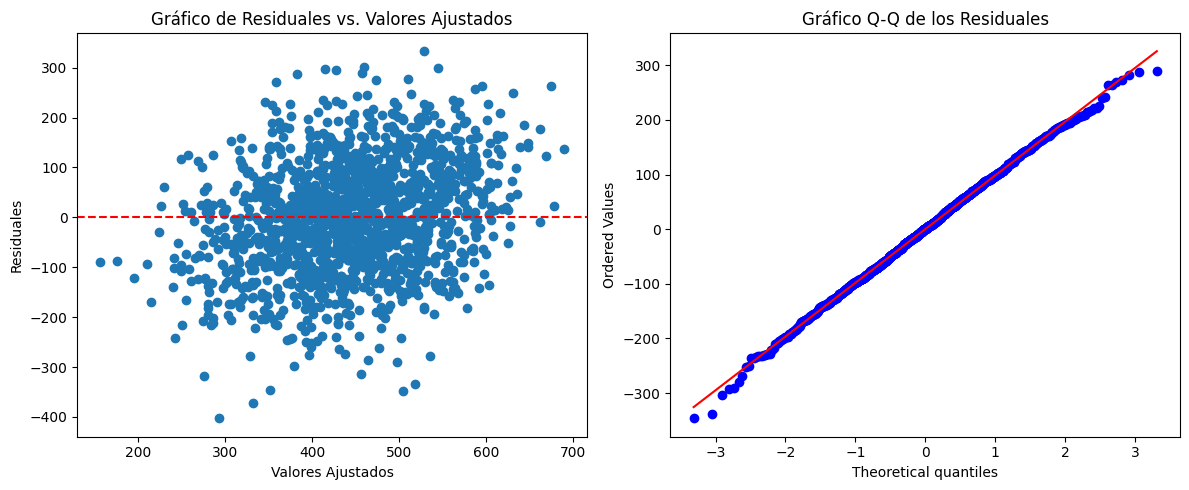

In [ ]:
# Gráfico de residuales vs. valores ajustados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(modelo_sm5.fittedvalues, residuales3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales vs. Valores Ajustados')

# Gráfico Q-Q de los residuales
plt.subplot(1, 2, 2)
stats.probplot(residuales5, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuales')

plt.tight_layout()
plt.show()

# **ANÁLISIS COMPARATIVO Y HALLAZGOS RELEVANTES**

In [ ]:
# Datos de R² de statsmodels
data = {
    'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5'],
    'R² (statsmodels)': [0.214, 0.051, 0.279, 0.297, 0.434],
    'R² ajustado':      [0.214, 0.049, 0.277, 0.294, 0.430]
}

# Crear tabla
df_r2_stats = pd.DataFrame(data)

# Mostrar
print("Tabla comparativa de R² (statsmodels):")
display(df_r2_stats)


Tabla comparativa de R² (statsmodels):


,Modelo,R² (statsmodels),R² ajustado
0,Modelo 1,0.214,0.214
1,Modelo 2,0.051,0.049
2,Modelo 3,0.279,0.277
3,Modelo 4,0.297,0.294
4,Modelo 5,0.434,0.430


Luego de analizar todos los modelos, podemos notar que el modelo 5 es el más completo de todos ya que tiene un R² de 43.4%, su capacidad de predicción resulta ser la mejor para tomar las decisiones comerciales pues tampoco esta sobreajustado. Este modelo nos ayuda para segmentar clientes, definir los descuentos que se hagan, diseñar campañas de promociones, y mejorar la satisfacción de los clientes para incrementar las ventas.

Teniendo en cuenta lo anterior estas serían las estrategias que se deberían aplicar para aumentar las ventas de la empresa (con respecto a las variables mas importantes):

- Aplicar descuentos planificados (pueden ser hechos estrategicamente en fechas importantes) genera un incremento fuerte en las ventas: $261.76 USD por cada punto de descuento por lo que las estrategias creadas deben estar bastante dirigidas a este punto.

- Participar en promociones también tiene un alto impacto positivo (+ $32.47 USD), lo que significa que la empresa se deben crear este tipo de campañas.

- El uso de tarjeta de crédito y satisfacción del cliente son impulsores importantes de venta, son útiles para segmentar clientes y mejorar experiencia.

- El número de contactos disminuye las ventas, lo que podría reflejar molestias por contacto excesivo, por lo que es importante revisar las prácticas de seguimiento y comunicación.

- El ingreso mensual y la edad del cliente tienen impacto positivo, pero menor comparado con otras variables. Son más útiles como segmentos base que como considerarlas puntos para hacer una acción directa.